<a href="https://colab.research.google.com/github/tomektom10/dataScienceBootCamp/blob/main/18_09_model_%2Bulepszenia_pojedyncze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
pip install bayesian-optimization

In [212]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [213]:
import pandas as pd
import pandas as pd
import numpy as np
df = pd.read_excel("DANE_KRZYCHU_całe_mniej.xlsx")

In [214]:

df_12 = df[df['Hour'] == 2]

df_12

,Datetime,Hour,Day,SK Price Spot EUR/MWh OKTE,Imbalance Price OKTE,SK Nuclear Production MWh/h H Actual,SK Hydro Run-of-river Production MWh/h H Actual,SK Natural Gas Power Production MWh/h H Actual,SK Solar Photovoltaic Production MWh/h H Actual,SK Hydro Pumped-storage Production MWh/h H Actual,SK Other Power Production MWh/h H Actual,SK Hydro Reservoir Production MWh/h H Actual,SK sum of Production MWh/h,SK Consumption MWh/h H Actual,SK Exchange Physical Flow Net Import MWh/h H Actual,Weighted average price of all trades (EUR/MWh)
1,2023-01-01 01:00:00,2,7,0.33,-4.997500,1976.0,247.0,183.0,0.0,0,234.0,2.0,2642.0,2201.0,-361.0,1.35
25,2023-01-02 01:00:00,2,1,57.98,-5.000000,1973.0,242.0,176.0,0.0,0,231.0,2.0,2624.0,2090.0,-439.0,69.16
49,2023-01-03 01:00:00,2,2,120.00,180.000000,1974.0,239.0,190.0,0.0,0,236.0,3.0,2642.0,2368.0,-223.0,108.84
73,2023-01-04 01:00:00,2,3,84.00,132.000000,1979.0,280.0,207.0,0.0,0,241.0,0.0,2707.0,2445.0,-217.0,87.39
97,2023-01-05 01:00:00,2,4,144.30,161.087500,1978.0,225.0,195.0,0.0,0,244.0,4.0,2646.0,2434.0,-107.0,124.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14569,2024-08-30 01:00:00,2,5,102.82,-4.561925,2356.0,239.0,107.0,1.0,0,161.0,0.0,2864.0,2338.0,-606.5,119.91
14593,2024-08-31 01:00:00,2,6,107.98,-4.613925,2361.0,208.0,103.0,0.0,0,178.0,0.0,2850.0,2353.0,-607.0,85.00
14617,2024-09-01 01:00:00,2,7,86.03,147.821250,2356.0,225.0,113.0,0.0,0,165.0,0.0,2859.0,2171.0,-726.8,90.73
14641,2024-09-02 01:00:00,2,1,99.52,-4.715550,2366.0,216.0,104.0,0.0,0,162.0,0.0,2848.0,2153.0,-732.5,96.45


In [215]:
df

,Datetime,Hour,Day,SK Price Spot EUR/MWh OKTE,Imbalance Price OKTE,SK Nuclear Production MWh/h H Actual,SK Hydro Run-of-river Production MWh/h H Actual,SK Natural Gas Power Production MWh/h H Actual,SK Solar Photovoltaic Production MWh/h H Actual,SK Hydro Pumped-storage Production MWh/h H Actual,SK Other Power Production MWh/h H Actual,SK Hydro Reservoir Production MWh/h H Actual,SK sum of Production MWh/h,SK Consumption MWh/h H Actual,SK Exchange Physical Flow Net Import MWh/h H Actual,Weighted average price of all trades (EUR/MWh)
0,2023-01-01 00:00:00,1,7,20.26,-5.000000,1979.0,252.0,178.0,0.0,0,233.0,2.0,2644.0,2339.00,-335.0,18.93
1,2023-01-01 01:00:00,2,7,0.33,-4.997500,1976.0,247.0,183.0,0.0,0,234.0,2.0,2642.0,2201.00,-361.0,1.35
2,2023-01-01 02:00:00,3,7,0.50,-5.000000,1981.0,244.0,177.0,0.0,0,231.0,2.0,2635.0,2211.00,-186.0,2.05
3,2023-01-01 03:00:00,4,7,0.50,-5.000000,1984.0,243.0,175.0,0.0,0,230.0,2.0,2634.0,2164.00,-316.0,2.26
4,2023-01-01 04:00:00,5,7,0.10,-5.000000,1984.0,241.0,177.0,0.0,0,229.0,2.0,2633.0,2152.00,-135.0,3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14683,2024-09-03 19:00:00,20,2,736.30,1547.580000,2330.0,545.0,530.0,1.0,600,221.0,154.0,4381.0,3122.89,-1086.0,915.22
14684,2024-09-03 20:00:00,21,2,622.58,1187.070000,2333.0,483.0,523.0,1.0,562,197.0,144.0,4243.0,3148.73,-964.0,814.30
14685,2024-09-03 21:00:00,22,2,243.10,398.989025,2343.0,408.0,494.0,0.0,358,189.0,36.0,3828.0,2964.00,-876.0,219.79
14686,2024-09-03 22:00:00,23,2,121.26,-2.901100,2347.0,302.0,466.0,0.0,10,180.0,37.0,3342.0,2731.00,-583.0,124.66


In [216]:
#missing_per_column = df.isna().sum()
#missing_per_column

In [217]:
#futures=['SK Residual Production Backcast', "SK Residual Load Backcast", 'Weighted average price of all trades (EUR/MWh)'  ]

In [218]:
df.columns

Index(['Datetime', 'Hour', 'Day', 'SK Price Spot EUR/MWh OKTE ',
       'Imbalance Price OKTE', 'SK Nuclear Production MWh/h H Actual',
       'SK Hydro Run-of-river Production MWh/h H Actual',
       'SK Natural Gas Power Production MWh/h H Actual',
       'SK Solar Photovoltaic Production MWh/h H Actual',
       'SK Hydro Pumped-storage Production MWh/h H Actual',
       'SK Other Power Production MWh/h H Actual',
       'SK Hydro Reservoir Production MWh/h H Actual',
       'SK sum of Production MWh/h', 'SK Consumption MWh/h H Actual',
       'SK Exchange Physical Flow Net Import MWh/h H Actual',
       'Weighted average price of all trades (EUR/MWh)'],
      dtype='object')

In [219]:
target = df_12['Weighted average price of all trades (EUR/MWh)'].values

In [220]:
input = df_12[[
              "Hour",
              "Day",
             'SK Nuclear Production MWh/h H Actual',
             'SK Hydro Run-of-river Production MWh/h H Actual',
             'SK Natural Gas Power Production MWh/h H Actual',
              "SK Solar Photovoltaic Production MWh/h H Actual",
             "SK Consumption MWh/h H Actual",
             'SK Exchange Physical Flow Net Import MWh/h H Actual',
             "Weighted average price of all trades (EUR/MWh)"]].values







In [221]:
scaler = MinMaxScaler()

futures_scaled = scaler.fit_transform(input)




In [222]:
# Create sequences for LSTM
def create_sequences(data, window_size, prediction_size):
    X = []
    y = []
    for i in range(len(data) - window_size - prediction_size + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size:i + window_size + prediction_size, -1])  # Predicting only the price
    return np.array(X), np.array(y)

In [223]:
#liczbs godzina na bazie ktorych generujemy predykcje
window_size = 2

prediction_size = 1

In [224]:
X,y = create_sequences (futures_scaled, window_size, prediction_size)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')

Shape of X_train: (488, 2, 9)
Shape of y_train: (488, 1)


In [227]:
from bayes_opt import BayesianOptimization
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np

def build_and_evaluate_lstm(window_size, lstm_units, dropout_rate, learning_rate):
    # Ensure the hyperparameters are in the correct format
    window_size = int(window_size)
    lstm_units = int(lstm_units)

    # Create sequences with the specified window size
    X, y = create_sequences(futures_scaled, window_size, prediction_size)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=prediction_size))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Return the validation loss
    val_loss = history.history['val_loss'][-1]
    return -val_loss

In [228]:
# Define the parameter space for optimization
param_bounds = {
    'window_size': (10, 100),       # The range for window size
    'lstm_units': (10, 100),        # The range for LSTM units
    'dropout_rate': (0.1, 0.5),     # The range for dropout rate
    'learning_rate': (0.0001, 0.01) # The range for learning rate
}

# Perform Bayesian optimization
optimizer = BayesianOptimization(
    f=build_and_evaluate_lstm,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=20)

# Extract the best parameters
best_params = optimizer.max['params']
best_window_size = int(best_params['window_size'])
best_lstm_units = int(best_params['lstm_units'])
best_dropout_rate = best_params['dropout_rate']
best_learning_rate = best_params['learning_rate']

print("Best Parameters:")
print(f"Window Size: {best_window_size}")
print(f"LSTM Units: {best_lstm_units}")
print(f"Dropout Rate: {best_dropout_rate}")
print(f"Learning Rate: {best_learning_rate}")

|   iter    |  target   | dropou... | learni... | lstm_u... | window... |
-------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 1         | -0.01752  | 0.2498    | 0.009512  | 75.88     | 63.88     |
| 2         | -0.02216  | 0.1624    | 0.001644  | 15.23     | 87.96     |
| 3         | -0.01451  | 0.3404    | 0.00711   | 11.85     | 97.29     |
| 4         | -0.01743  | 0.433     | 0.002202  | 26.36     | 26.51     |
| 5         | -0.01511  | 0.2217    | 0.005295  | 48.88     | 36.21     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 6         | -0.01221  | 0.3814    | 0.009813  | 11.89     | 97.33     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 7         | -0.01452  | 0.4518    | 0.009645  | 11.96     | 97.4      |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 8         | -0.01389  | 0.4862    | 0.004813  | 71.67     | 96.16     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 9         | -0.01746  | 0.3083    | 0.005573  | 99.8      | 40.08     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 10        | -0.01753  | 0.3387    | 0.006252  | 71.63     | 96.15     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 11        | -0.01465  | 0.4748    | 0.00753   | 36.08     | 88.29     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 12        | -0.01758  | 0.1998    | 0.008122  | 43.09     | 91.58     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 13        | -0.02473  | 0.1543    | 0.000971  | 57.87     | 19.97     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 14        | -0.01993  | 0.4685    | 0.002021  | 23.17     | 43.63     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 15        | -0.01717  | 0.2619    | 0.001645  | 82.84     | 26.47     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 16        | -0.01374  | 0.3058    | 0.01      | 11.99     | 97.36     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 17        | -0.0125   | 0.3429    | 0.01      | 11.85     | 97.46     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 18        | -0.01545  | 0.4807    | 0.01      | 11.76     | 97.41     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 19        | -0.01101  | 0.1396    | 0.008116  | 82.36     | 97.77     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 20        | -0.0111   | 0.1349    | 0.008603  | 82.36     | 97.78     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 21        | -0.01185  | 0.2421    | 0.009959  | 82.45     | 97.87     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 22        | -0.01827  | 0.3061    | 0.0003269 | 82.28     | 97.75     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 23        | -0.01114  | 0.1       | 0.01      | 82.5      | 97.81     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 24        | -0.01108  | 0.1       | 0.01      | 82.48     | 97.62     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 25        | -0.01188  | 0.2381    | 0.01      | 82.61     | 97.7      |
Best Parameters:
Window Size: 97
LSTM Units: 82
Dropout Rate: 0.1395779892819241
Learning Rate: 0.008115995015512025


In [229]:
# # Przekształcenie danych do formatu akceptowalnego przez LSTM (próbki, kroki czasowe, cechy)
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# # X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [230]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [231]:
# Inicjalizacja modelu LSTM
model = Sequential()

# Dodanie warstwy LSTM
model.add(LSTM(units=25, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Dodanie kolejnej warstwy LSTM
#model.add(LSTM(units=2, return_sequences=False))
#model.add(Dropout(0.2))

# Dodanie warstwy wyjściowej
model.add(Dense(units = prediction_size))


In [232]:
# Kompilacja modelu
model.compile(optimizer='adam', loss='mean_squared_error')

# Wyświetlenie architektury modelu
model.summary()

Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                       │ (None, 25)                  │           3,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_78 (Dropout)                 │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,526 (13.77 KB)

 Trainable params: 3,526 (13.77 KB)

 Non-trainable params: 0 (0.00 B)

In [233]:
# Trenowanie modelu LSTM
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2433 - val_loss: 0.1014
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0832 - val_loss: 0.0323
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0387 - val_loss: 0.0289
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0378 - val_loss: 0.0273
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0373 - val_loss: 0.0257
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0335 - val_loss: 0.0238
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0328 - val_loss: 0.0228
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0312 - val_loss: 0.0214
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245 - val_loss: 0.0210
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0277 - val_loss: 0.0201
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0288 - val_loss: 0.0196
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

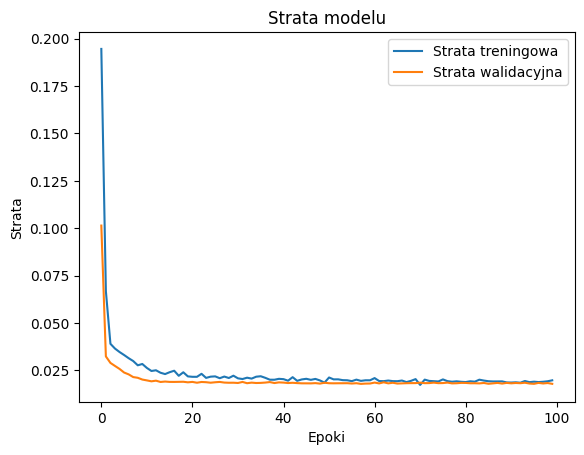

In [234]:
# Wykres strat treningowych i walidacyjnych
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.title('Strata modelu')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

In [235]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163 
Test Loss: 0.01783410832285881


In [236]:
# Make predictions
predictions = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [237]:
y_test_24 = y_test[:, -1]

In [238]:
predictions_24 = predictions[:, -1]

In [239]:
y_test_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((y_test_24.shape[0], 8)), y_test_24.reshape(-1, 1)], axis=1))[:, -1]


In [240]:
np.concatenate([np.zeros((y_test.shape[0], 8)), y_test],axis=1).shape

(122, 9)

In [241]:
np.zeros((y_test.shape[0], 8)).shape

(122, 8)

In [242]:
predictions_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((predictions_24.shape[0], 8)), predictions_24.reshape(-1, 1)], axis=1))[:, -1]

In [243]:
predictions_rescaled

array([ 77.5788568 ,  31.48514348,  76.20570335, 103.54882205,
        83.91904966,  83.29020204,  70.99242032,  52.28827146,
        80.33082403,  82.34405509,  89.31712877,  86.35264525,
        80.68198939,  77.75913954,  90.46522355,  62.79169763,
       102.65151091,  72.35908651,  92.16089387, 100.66167344,
        99.02698119,  88.6980227 ,  78.29399131, 102.34443327,
        85.87270574,  67.82565821,  77.95594451,  88.75965163,
        72.74936746,  76.37791437,  84.58214743,  67.08120301,
        99.39000073,  66.57981181,  73.56159207,  73.51115046,
       115.56633408,  92.66044452,  26.51208361, 107.13980584,
        84.10063946,  82.11153821,  96.84932275,  35.54940346,
       114.33370227,  98.79682234,  58.63624263,  70.98372441,
        85.13968859, 108.34533629,  91.99911794,  55.90695412,
        71.55954832,  66.9723761 ,  67.63853611,  99.04911041,
       104.01302357, 100.18264087, 117.85405179,  84.99040704,
        73.27341603, 122.06046055, 100.71016781,  95.20

In [244]:
# y_test_rescaled = scaler.inverse_transform(y_test)



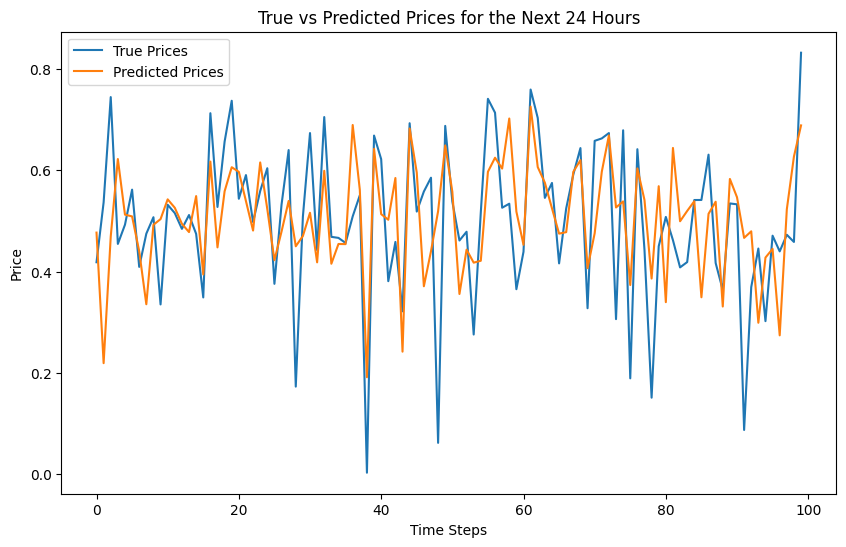

In [245]:
# Plot true vs predicted prices for the next 24 hours
plt.figure(figsize=(10, 6))
plt.plot(y_test_24[:100], label='True Prices')
plt.plot(predictions_24[:100], label='Predicted Prices')
plt.title('True vs Predicted Prices for the Next 24 Hours')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

In [246]:
true_24th = y_test[:, -1]        # True values for the 24th hour
predicted_24th = predictions[:, -1]  # Predicted values for the 24th hour

In [247]:
percent_errors = np.abs(true_24th - predicted_24th) / np.abs(true_24th) * 100

In [248]:
sr_blad = np.mean(percent_errors)

In [249]:
sr_blad

77.38770736369332

In [250]:
##### do zmiany parametrow sieciu moge zmienic size okna, liczbe unit do danych,

In [251]:
percent_errors = np.abs(y_test_24 - predictions_24) / np.abs(y_test_24) * 100

In [252]:
sr_blad_real = np.mean(percent_errors)

In [253]:
sr_blad_real

77.38770736369332

In [254]:
###### WPROWADZANIE REALNYCH WARTOSCI

In [255]:
X_test[-1]

array([[0.        , 0.16666667, 0.798     , 0.49385246, 0.21715328,
        0.        , 0.51960784, 0.45644748, 0.70465337],
       [0.        , 0.33333333, 0.804     , 0.45081967, 0.24270073,
        0.        , 0.55525847, 0.48590948, 0.64124909]])

In [256]:
predictions = model.predict(np.array([X_test[-1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [257]:
predictions.shape

(1, 1)

In [258]:
predictions_24 = np.array([predictions[:, -1]])

In [259]:
predictions_24.shape

(1, 1)

In [260]:
predictions_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((predictions_24.shape[0], 8)), predictions_24.reshape(-1, 1)], axis=1))[:, -1]

In [261]:
predictions_rescaled

array([97.89701445])

In [262]:
#wczytywanie realnych danych

In [263]:
df1 = pd.read_excel("swierze)dane.xlsx")

In [264]:
df1= df1[[     "Hour",
              "Day",
             'SK Nuclear Production MWh/h H Actual',
             'SK Hydro Run-of-river Production MWh/h H Actual',
             'SK Natural Gas Power Production MWh/h H Actual',
              "SK Solar Photovoltaic Production MWh/h H Actual",
             "SK Consumption MWh/h H Actual",
             'SK Exchange Physical Flow Net Import MWh/h H Actual',
             "Weighted average price of all trades (EUR/MWh)"]]


In [265]:
df.columns

Index(['Datetime', 'Hour', 'Day', 'SK Price Spot EUR/MWh OKTE ',
       'Imbalance Price OKTE', 'SK Nuclear Production MWh/h H Actual',
       'SK Hydro Run-of-river Production MWh/h H Actual',
       'SK Natural Gas Power Production MWh/h H Actual',
       'SK Solar Photovoltaic Production MWh/h H Actual',
       'SK Hydro Pumped-storage Production MWh/h H Actual',
       'SK Other Power Production MWh/h H Actual',
       'SK Hydro Reservoir Production MWh/h H Actual',
       'SK sum of Production MWh/h', 'SK Consumption MWh/h H Actual',
       'SK Exchange Physical Flow Net Import MWh/h H Actual',
       'Weighted average price of all trades (EUR/MWh)'],
      dtype='object')

In [266]:
df_numeryczny = df1[df1["Hour"]==2]

In [267]:
df1.values

array([[ 2.4000e+01,  2.0000e+00,  1.9790e+03, ...,  2.3390e+03,
        -3.3500e+02,  1.8930e+01],
       [ 2.3000e+01,  2.0000e+00,  1.9760e+03, ...,  2.2010e+03,
        -3.6100e+02,  1.3500e+00],
       [ 2.2000e+01,  2.0000e+00,  1.9810e+03, ...,  2.2110e+03,
        -1.8600e+02,  2.0500e+00],
       ...,
       [ 3.0000e+00,  5.0000e+00,  1.9640e+03, ...,  2.9220e+03,
        -1.4800e+02,  1.3958e+02],
       [ 2.0000e+00,  5.0000e+00,  1.9640e+03, ...,  2.7720e+03,
        -2.3500e+02,  1.2895e+02],
       [ 1.0000e+00,  5.0000e+00,  1.9660e+03, ...,  2.6650e+03,
        -2.7300e+02,  1.1833e+02]])

In [268]:
probka = df_numeryczny.values

In [269]:
probka_scaled = scaler.transform(probka)

In [270]:
probka_scaled.shape

(5, 9)

In [271]:
predictions = model.predict(np.array([probka_scaled]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


In [272]:
predictions.shape

(1, 1)

In [273]:
predictions = predictions.reshape(1)

In [274]:
predictions_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((predictions.shape[0], 8)), predictions.reshape(-1, 1)], axis=1))[:, -1]

In [275]:
predictions_rescaled

array([151.03696979])

In [276]:
# Przekształcamy tablicę na pionowy format
def make_vertical(arr):
    if arr.ndim == 1:
        arr = arr.reshape(-1, 1)
    return arr

# Uzyskujemy pionowy format
predictions_vertical = make_vertical(predictions_rescaled)

# Wyświetlamy tablicę pionowo bez nawiasów
for value in predictions_vertical:
    print(value[0])

151.03696978747845
